# Hackathon 1: descriptive statistics, estimation and bootstrapping

This project illustrates the course LEPL1109 with an industrial applications of statistics. You will analyse the performance of wind farms located in the Walloon Brabant near Beauvechain and in the high Fens, close to Elsenborn. Each wind farm exploits 8 wind turbines. The kinetic power, noted Pk, (in watt) of one wind turbine is calculated with the formula 

Pk (W) = 0.5 x Rho x S x V^3

Where 

S   : is the surface of the circle in square meters with a radius equal to the length of blades (32 m).
Rho : is the air density (“masse volumique”). We consider here an average value of 1.2 kg/m^3
V   : is the speed of wind in m/s.

According to the Betz limit, only 59.3% of the kinetic energy from wind can be used to spin the turbine and generate electricity. In reality, turbines cannot reach the Betz limit, and the efficiency is estimated to 42% of the kinetic power. One wind turbine generates an electric power Pe = 0.42 x Pk. 

The wind turbins are stopped if the wind speed is above 90 km/h.

The file “BeauvechainWind.csv” and “Elsenborn.csv” contains the average daily wind speeds, measured in km/h, at Beauvechain and  Elsenborn (source www. https://www.ecad.eu/)

FILE FORMAT (MISSING VALUE CODE IS -9999):
01-06 SOUID: Source identifier
08-15 DATE : Date YYYYMMDD
17-21 FG   : wind speed in km/h
23-27 Q_FG : Quality code for FG (0='valid'; 1='suspect'; 9='missing')


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Langlois Clément 79801600

Part. 2: Rigolet Danaïe 22061900

Part. 3: Amelinckx Sébastien 55691700

Part. 4: Van Droogenbroeck David 52831700


------------------------------------------------------------------------------------------------------
1.	Write a function computing the electric power capacity (in Mega Watts = 10^6 W), for the two wind farms using wind data from the 1/1/2017 to the 1/1/2021

•	Do not forget to set the production to zero if the wind speed is above 90 km. 

•	Take care to converts units.

•	Remove all days with missing data (error code 1 or 9) for Beauvechain or Elsenborn

------------------------------------------------------------------------------------------------------

In [2]:
# Imports
import pandas as pd
import numpy as np
import scipy.stats as sts

# Get the data
data_els = pd.read_csv("Elsenborn.csv")
data_bea = pd.read_csv("Beauvechain.csv")

In [14]:
df = pd.read_csv('Beauvechain.csv')
df2 = pd.read_csv('Elsenborn.csv')
    
df = df.drop(columns=' SOUID')
df2 = df2.drop(columns=' SOUID')
    
# utilisation de la date comme ID
df.set_index('    DATE',inplace=True)
df2.set_index('    DATE',inplace=True)
    
# suppression des dates hors période d'interet
for i in df.index:
    if (i>20210101 or i<20170101):
        df=df.drop(i)

for i in df2.index:
    if (i>20210101 or i<20170101):
        df2=df2.drop(i)

# suppression des dates avec des donnees manquantes
for i in df.index:
    if(df.loc[i].at[' Q_FG']!=0 or df2.loc[i].at[' Q_FG']!=0):
        df=df.drop(i)
        df2=df2.drop(i)
        
data_els_clean = df2
data_bea_clean = df

In [15]:
data_els_clean

,FG,Q_FG
DATE,,
20170101,18,0
20170102,27,0
20170103,41,0
20170104,62,0
20170105,34,0
...,...,...
20201228,31,0
20201229,27,0
20201230,27,0


In [3]:
dates = [_ for _ in range(20170101, 20210101)]

# Select useful rows
data_els_to_clean = data_els[data_els[data_els.keys()[1]].isin(dates)]
data_bea_to_clean = data_bea[data_bea[data_bea.keys()[1]].isin(dates)]

# Remove missing data
data_els_clean = data_els_to_clean[data_els[data_els.keys()[2]] != -9999]
data_bea_clean = data_bea_to_clean[data_bea[data_bea.keys()[2]] != -9999]

In [40]:
def electricity_prod(data, is_df = True):
    
    if is_df:
        # We only use wind speed
        wind_speeds = data[data.keys()[0]].tolist()
    else:
        wind_speeds = data
    
    prod = [0 for _ in range(len(wind_speeds))]
    
    for iter in range(len(wind_speeds)):
        if wind_speeds[iter] < 90:
            Pk = (0.5 * 1.2 * (np.pi * 32 * 32) * np.power(wind_speeds[iter] / 3.6, 3))
            prod[iter] = 8 * 0.42 * Pk / 10**6
    
    return prod

In [41]:
els_prod = electricity_prod(data_els_clean)
bea_prod = electricity_prod(data_bea_clean)

In [42]:
def recap(elec_prod, location):
    print("--- Production at ", location)
    print("Average production:", np.mean(elec_prod), "MW")
    print("Minimum production:", np.min(elec_prod), "MW")
    print("Maximum production:", np.max(elec_prod), "MW")
    print("Days without production:", elec_prod.count(0))
    print("Percentage of days with production:", (len(elec_prod) - elec_prod.count(0)) / len(elec_prod) * 100, "%")
    
recap(els_prod, "Elsenborn")
recap(bea_prod, "Beauvechain")

--- Production at  Elsenborn
Average production: 5.650137802821234 MW
Minimum production: 0.008896369833454475 MW
Maximum production: 94.72854598662322 MW
Days without production: 0
Percentage of days with production: 100.0 %
--- Production at  Beauvechain
Average production: 12.600719197860638 MW
Minimum production: 0.0 MW
Maximum production: 97.99476476750885 MW
Days without production: 28
Percentage of days with production: 98.01980198019803 %


#### Comment briefly your results:

While both farms have pretty similar peak production, we can clearly see that the wind is on average way faster in Beauvechain than it is in Elsenborn, since the average production of the latter is lower than half that of Beauvechain.

------------------------------------------------------------------------------------------------------------------------

2.	Plot histograms and box plots of electric power capacity (MW) from the 1/1/2017 to the 1/1/2021 (both sites). 

------------------------------------------------------------------------------------------------------------------------

In [19]:
import matplotlib.pyplot as plt

In [20]:
def plot_prod(prod, location):
    plt.hist(prod, bins=100, density=True, color='b') 
    plt.xlabel("Production (MW)")
    plt.ylabel("% of data")
    plt.title(location)
    

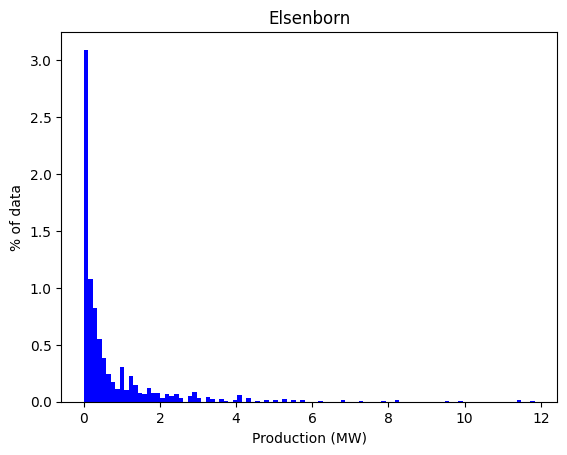

In [21]:
plot_prod(els_prod, "Elsenborn")

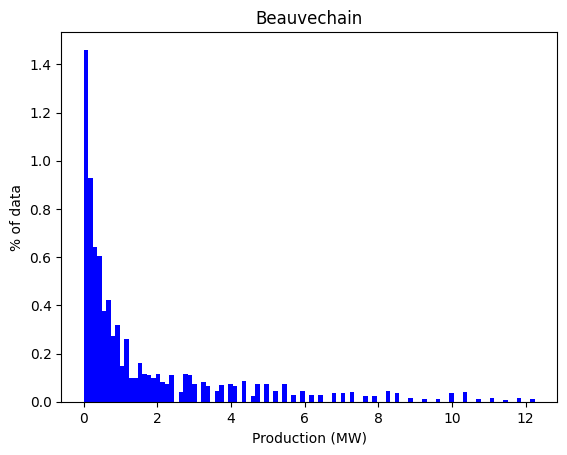

In [22]:
plot_prod(bea_prod, "Beauvechain")

In [23]:
def boxplot_prod(prod, location):
    fig, ax = plt.subplots()
    ax.set_title(location)
    ax.set_ylabel("Production (MW)")
    ax.boxplot(prod)

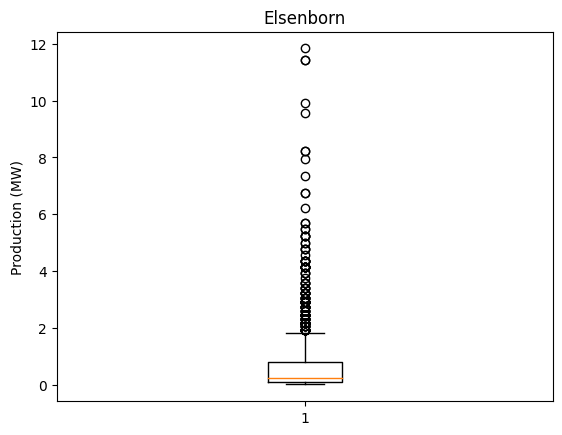

In [24]:
boxplot_prod(els_prod, "Elsenborn")

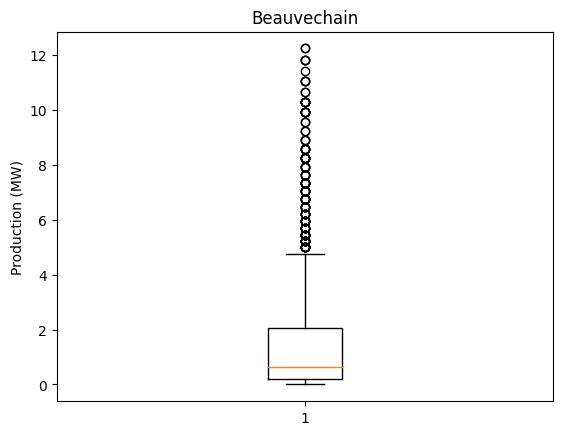

In [25]:
boxplot_prod(bea_prod, "Beauvechain")

------------------------------------------------------------------------------------------------------

3.	Compare the following statistics of both sites and draw a first conclusions

•	Average and median powers for each farm (MW)

•	Standard deviations of powers, for each farm (MW)

•	5% and 95% percentiles of powers, for each farm (MW)

The average and standard deviation of the total power capacities (Beauvechain + Elsenborn).

------------------------------------------------------------------------------------------------------

In [43]:
print("--- Elsenborn")
print("Average production:", np.mean(els_prod))
print("Median production:", np.median(els_prod))
print("Standard deviation:", np.std(els_prod))
print("5% percentile:", np.percentile(els_prod, 5))
print("95% percentile:", np.percentile(els_prod, 95))
print("--- Beauvechain")
print("Average production:", np.mean(bea_prod))
print("Median production:", np.median(bea_prod))
print("Standard deviation:", np.std(bea_prod))
print("5% percentile:", np.percentile(bea_prod, 5))
print("95% percentile:", np.percentile(bea_prod, 95))

print("--- Elsenborn + Beauvechain")
tot_mean = (sum(els_prod) + sum(bea_prod)) / (len(els_prod) + len(bea_prod))
print("Average production:", tot_mean)
els_prod_squared = [val ** 2 for val in els_prod]
bea_prod_squared = [val ** 2 for val in bea_prod]
tot_mean_squared_values = (sum(els_prod_squared) + sum(bea_prod_squared)) / (len(els_prod) + len(bea_prod))
print("Standard deviation:", np.sqrt(tot_mean_squared_values + (tot_mean**2)))

--- Elsenborn
Average production: 5.650137802821234
Median production: 1.9216158840261657
Standard deviation: 9.762008248900587
5% percentile: 0.10133521263419236
95% percentile: 23.127086422515433
--- Beauvechain
Average production: 12.600719197860638
Median production: 4.995450667263333
Standard deviation: 17.83085011248488
5% percentile: 0.2402019855032707
95% percentile: 54.0756109922025
--- Elsenborn + Beauvechain
Average production: 9.125428500340927
Standard deviation: 19.627596553187267


#### Comment briefly your results:

We already saw that Beauvechain produces, on average, a lot more power than Elsenborn.

The median for Beauvechain being > 2.5 times higher than Elsenborn's tells us that bad days are even worse for Elsenborn's power production than they are for Beavechain.

Standard deviation being higher aswell for Beauvechain was to be expected because it has a bigger spread of daily productions, on top of having some days where the wind is so fast that turbines cannot work, leading to no production at all. It has both very high and very low production days, whereas Elsenborn's production is usually low, with some spikes here and there, leading to a lower variance in power (as the percentile values further emphasize).


------------------------------------------------------------------------------------------------------
4.	Fit Gamma and Inverse Gaussian distributions to wind speeds (in Km/h) in Beauvechain and Elsenborn. Estimate their parameters by log-likelihood maximization (MLE). Which distribution is the best one? Compare the histograms of winds with the fitted pdf’s on the same plot.
------------------------------------------------------------------------------------------------------

In [44]:
def fit_plot_prod(prod, title, function, meth, function2=None, meth2=None, label=None, label2=None):
    # Show data histogram
    plt.hist(prod, bins=100, density=True, alpha=0.6, color='b', label='Data') 
    
    # Show first fitted function with specified method
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    alpha, loc, scale = function.fit(prod, method=meth)
    p = function.pdf(x, alpha, loc, scale)
    if label != None:
        plt.plot(x, p, 'orange', linewidth=2, label=label)
    else:
        plt.plot(x, p, 'orange', linewidth=2, label=meth)
          
    # If we want to compare two fitted functions
    if function2 != None:
        alpha2, loc2, scale2 = function2.fit(prod, method=meth2)
        p2 = function2.pdf(x, alpha2, loc2, scale2)
        if label != None:
            plt.plot(x, p2, 'r', linewidth=2, label=label2)
        else:
            plt.plot(x, p2, 'r', linewidth=2, label=meth2)
        
    # Format and print the graph
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

In [45]:
# We get just the wind speeds
els_winds = [sp for sp in data_els_clean[data_els_clean.keys()[0]].tolist()]
bea_winds = [sp for sp in data_bea_clean[data_bea_clean.keys()[0]].tolist()]

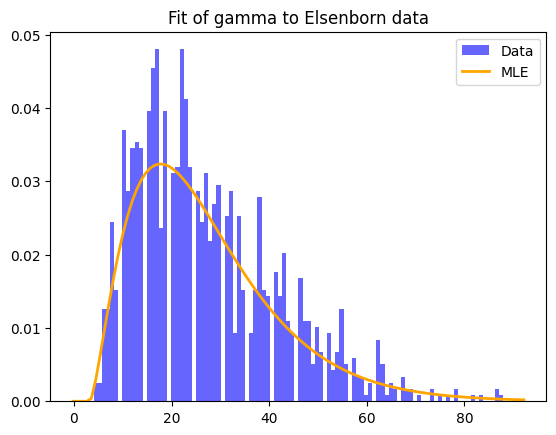

In [46]:
fit_plot_prod(els_winds, "Fit of gamma to Elsenborn data", sts.gamma, "MLE")

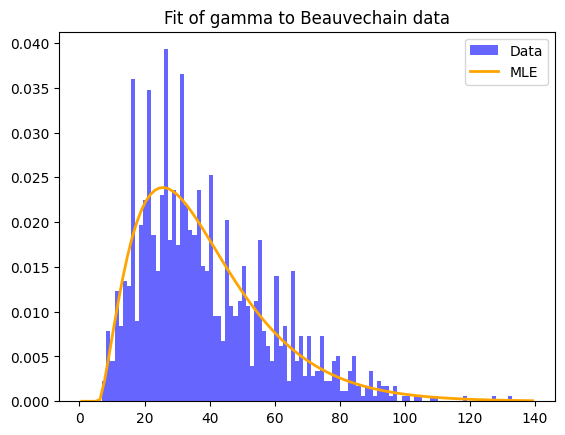

In [47]:
fit_plot_prod(bea_winds, "Fit of gamma to Beauvechain data", sts.gamma, "MLE")

#### Comment briefly your results:

The Gamma distribution seems to follow the overall trend of the data.

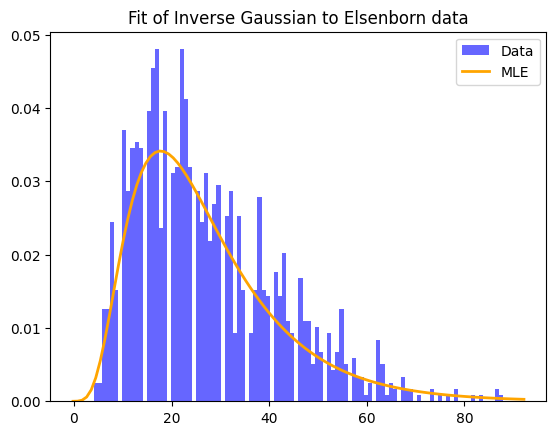

In [48]:
fit_plot_prod(els_winds, "Fit of Inverse Gaussian to Elsenborn data", sts.invgauss, "MLE")

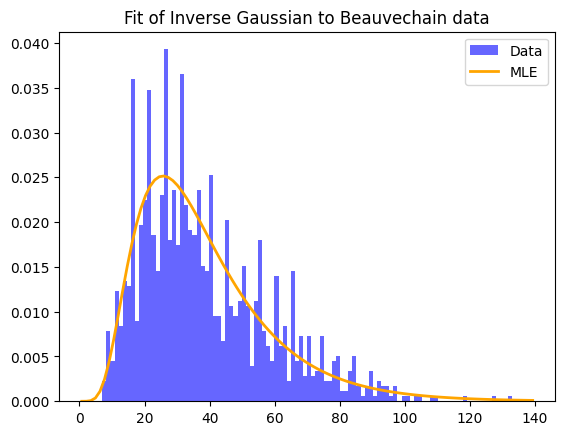

In [49]:
fit_plot_prod(bea_winds, "Fit of Inverse Gaussian to Beauvechain data", sts.invgauss, "MLE")

#### Comment briefly your results

The Inverse Gaussian distribution also follows the overall trend of the data, but it seems a bit more skewed towards higher outlier values.

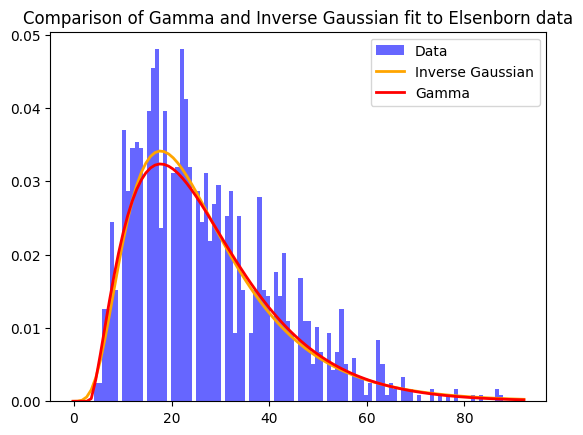

In [50]:
fit_plot_prod(els_winds, "Comparison of Gamma and Inverse Gaussian fit to Elsenborn data",
              sts.invgauss, "MLE", 
              sts.gamma, "MLE",
              label="Inverse Gaussian", label2="Gamma")

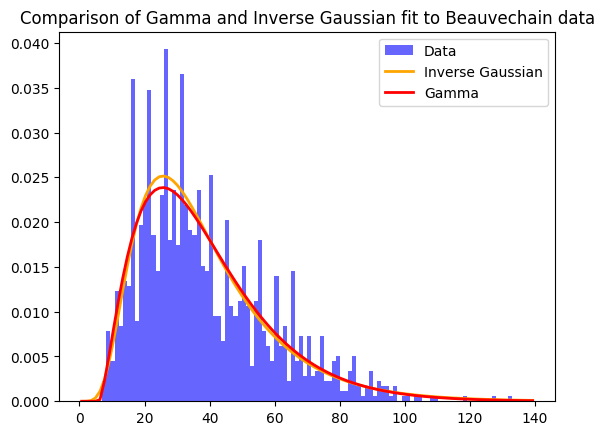

In [51]:
fit_plot_prod(bea_winds, "Comparison of Gamma and Inverse Gaussian fit to Beauvechain data",
              sts.invgauss, "MLE", 
              sts.gamma, "MLE",
              label="Inverse Gaussian", label2="Gamma")

### Conclusion on Gamma vs Inverse Gaussian

Neither fit is perfect and their results are pretty close to one another. Since it is impossible for there to be no wind at all, we will go with the **Gamma** as our default choice as it better fits low wind speeds. We would rather underestimate power production a bit than risk a power shortage.

------------------------------------------------------------------------------------------------------
5.	Compute numerically for both sites, the following statistics 

•	Expected and median powers for each farm (MW)

•	Standard deviation of powers for each farm (MW)

•	5% and 95% percentiles of powers for each farm (MW)

Use the best distributions fitted in Question 4 (not observed values)

------------------------------------------------------------------------------------------------------

In [52]:
# We compute distributions using the Gamma estimators

els_gamma_fit_values = sts.gamma.fit(els_winds)
els_gamma_fit = sts.gamma.rvs(a=els_gamma_fit_values[0],
                              loc=els_gamma_fit_values[1],
                              scale=els_gamma_fit_values[2],
                              size=len(els_winds))

bea_gamma_fit_values = sts.gamma.fit(bea_winds)
bea_gamma_fit = sts.gamma.rvs(a=bea_gamma_fit_values[0],
                              loc=bea_gamma_fit_values[1],
                              scale=bea_gamma_fit_values[2],
                              size=len(bea_winds))

In [53]:
print("--- Elsenborn ---")
print("Expected power production:", round(np.mean(electricity_prod(els_gamma_fit, False)), 4), "MW", 
      "(real value:", round(np.mean(els_prod), 4), "MW)")
print("Median power production:", round(np.median(electricity_prod(els_gamma_fit, False)), 4), "MW", 
      "(real value:", round(np.median(els_prod), 4), "MW)")
print("Standard deviation of power production:", round(np.std(electricity_prod(els_gamma_fit, False)), 4), "MW", 
      "(real value:", round(np.std(els_prod), 4), "MW)")
print("5% percentile of power production:", round(np.percentile(electricity_prod(els_gamma_fit, False), 5), 4) , "MW",
      "(real value:", round(np.percentile(els_prod, 5), 4), "MW)")
print("95% percentile of power production:", round(np.percentile(electricity_prod(els_gamma_fit, False), 95), 4), "MW", 
      "(real value:", round(np.percentile(els_prod, 95), 4), "MW)")

print("--- Beauvechain ---")
print("Expected power production:", round(np.mean(electricity_prod(bea_gamma_fit, False)), 4), "MW", 
      "(real value:", round(np.mean(bea_prod), 4), "MW)")
print("Median power production:", round(np.median(electricity_prod(bea_gamma_fit, False)), 4), "MW", 
      "(real value:", round(np.median(bea_prod), 4), "MW)")
print("Standard deviation of power production:", round(np.std(electricity_prod(bea_gamma_fit, False)), 4), "MW", 
      "(real value:", round(np.std(bea_prod), 4), "MW)")
print("5% percentile of power production:", round(np.percentile(electricity_prod(bea_gamma_fit, False), 5), 4) , "MW",
      "(real value:", round(np.percentile(bea_prod, 5), 4), "MW)")
print("95% percentile of power production:", round(np.percentile(electricity_prod(bea_gamma_fit, False), 95), 4), "MW", 
      "(real value:", round(np.percentile(bea_prod, 95), 4), "MW)")

--- Elsenborn ---
Expected power production: 5.7997 MW (real value: 5.6501 MW)
Median power production: 2.0384 MW (real value: 1.9216 MW)
Standard deviation of power production: 10.6197 MW (real value: 9.762 MW)
5% percentile of power production: 0.0954 MW (real value: 0.1013 MW)
95% percentile of power production: 24.5097 MW (real value: 23.1271 MW)
--- Beauvechain ---
Expected power production: 11.6257 MW (real value: 12.6007 MW)
Median power production: 5.0538 MW (real value: 4.9955 MW)
Standard deviation of power production: 16.6393 MW (real value: 17.8309 MW)
5% percentile of power production: 0.1757 MW (real value: 0.2402 MW)
95% percentile of power production: 48.9613 MW (real value: 54.0756 MW)


#### Comment briefly your results:

As we expected, power production predicted using our fitted distributions is on average a bit lower than the real values. The same goes for the 5 and 95 percentiles. The medians and standard deviation, on the other hand, tend to get a bit higher than the actual values (because the fitted functions tend to "spread" the outliers over the whole distribution).

------------------------------------------------------------------------------------------------------

6.	Same question as Q.4 but this time, you fit the best distribution by the methods of moments MM, (in Python). Compare parameter estimates and plot pdf’s obtained by MLE and MM for both wind farms.

------------------------------------------------------------------------------------------------------

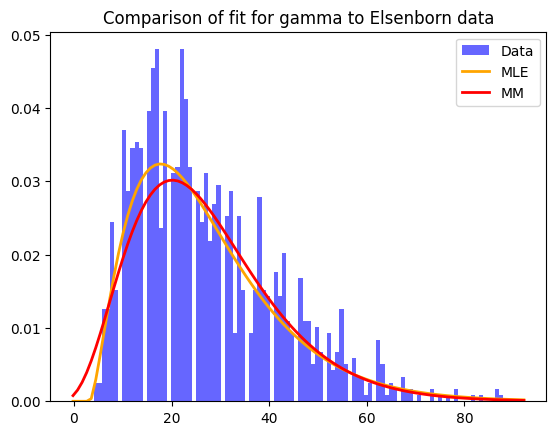

In [54]:
fit_plot_prod(els_winds, "Comparison of fit for gamma to Elsenborn data",
              sts.gamma, "MLE", 
              sts.gamma, "MM")

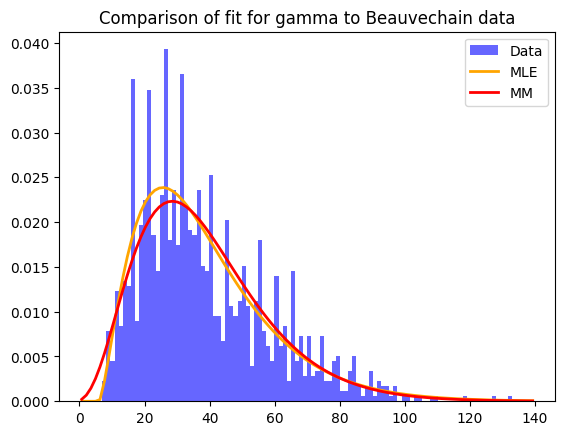

In [55]:
fit_plot_prod(bea_winds, "Comparison of fit for gamma to Beauvechain data",
              sts.gamma, "MLE", 
              sts.gamma, "MM")

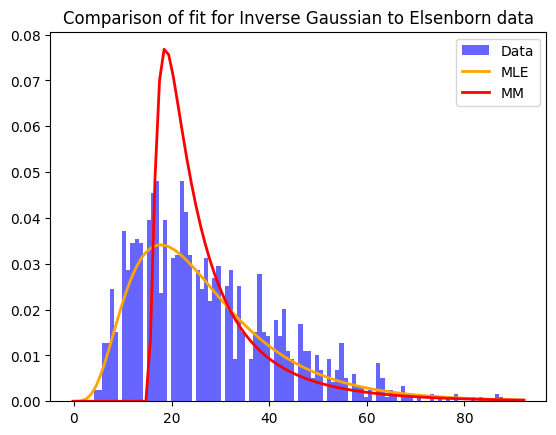

In [56]:
fit_plot_prod(els_winds, "Comparison of fit for Inverse Gaussian to Elsenborn data",
              sts.invgauss, "MLE", 
              sts.invgauss, "MM")

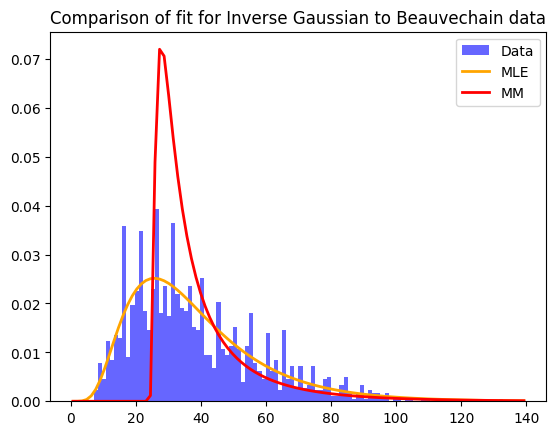

In [57]:
fit_plot_prod(bea_winds, "Comparison of fit for Inverse Gaussian to Beauvechain data",
              sts.invgauss, "MLE", 
              sts.invgauss, "MM")

#### Comment briefly your results:

While for the Gamma distribution MLE and MM give fairly similar results, for the Inverse Gaussian the method of moments gives results that are completely off.

------------------------------------------------------------------------------------------------------

7.	Bootstrap 1000 times a sample of 500 daily speeds of wind for Beauvechain and compute a 5% confidence interval for parameter(s) estimates for the best distribution of Question 4) modelling winds in Beauvechain. How do you interpret the results

------------------------------------------------------------------------------------------------------

In [58]:
boot_amount = 1000
sample_size = 500

# We have BOOT_AMOUNT of samples containing SAMPLE_SIZE elements
bea_boot_winds = [np.random.choice(bea_winds, sample_size) for _ in range(boot_amount)]

In [59]:
def conf_interval(data, b_amount, func, conf_alpha=0.05):
    
    i1 = 0
    i2 = 0
    
    for i in range(b_amount):
        alpha, loc, scale = func.fit(bea_boot_winds[i])
        interval = func.interval(conf_alpha, alpha, loc, scale)
        i1 += interval[0]
        i2 += interval[1]
        
    return [round((i1 / b_amount), 3), round((i2 / b_amount), 3)]

In [60]:
conf_interval(bea_boot_winds, boot_amount, sts.gamma)

[33.037, 35.389]

In [61]:
np.mean(bea_winds)

38.403818953323906

Comment briefly your results



------------------------------------------------------------------------------------------------------

8.	Let us denote by X the wind speed observed at Beauvechain on a day of the year. The winds observed over 30 days are denoted by (X1,…,X30). They are realizations of X, a random variable with the distribution fitted in Question 4. If M=max{ X1,…,X30},  

•	find the statistical law of M (equation requested, hint use the cdf of X) 

•	plot the pdf and cdf of M. 

•	Determine the wind value, p5, such that  P(M>p5)=95%.


------------------------------------------------------------------------------------------------------

Comment briefly your results



In [ ]:
# Code here

